In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
data = pd.read_csv(r"D:\Data\Deep_Learning\demo_data\1.ushape.csv", header=None)

In [4]:
data.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [6]:
data.shape

(100, 3)

In [7]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

In [8]:
data.duplicated().value_counts()

False    100
dtype: int64

### Exploratory Data Analysis

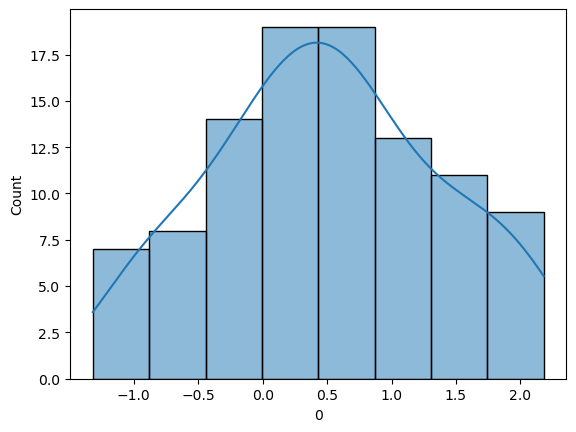

In [9]:
sns.histplot(data[0], kde=True);

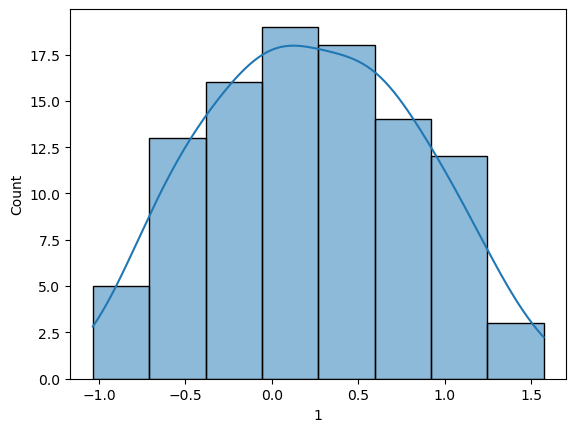

In [10]:
sns.histplot(data[1],kde=True);

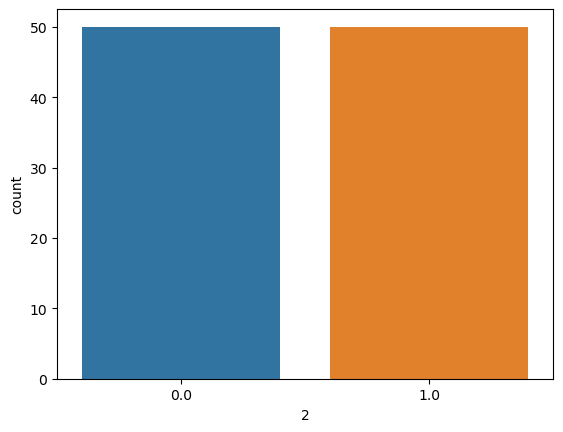

In [11]:
sns.countplot(x=data[2]);

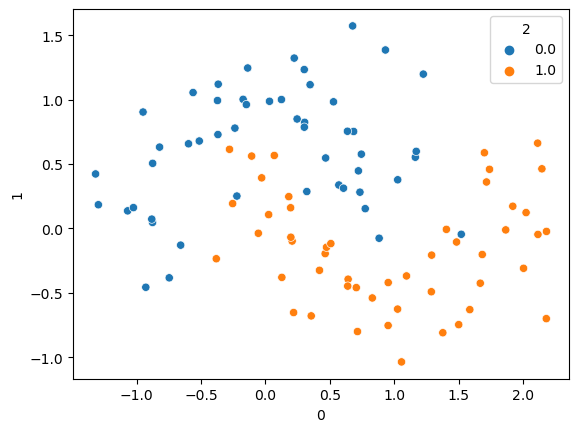

In [12]:
sns.scatterplot(x=data[0], y=data[1], hue=data[2]);

## Splitting the data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[[0,1]],data[2],test_size=0.1)

### Rescaling the features

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [15]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Buliding the model using sigmoid

In [16]:
model = Sequential()
model.add(Dense(3, activation='sigmoid', input_dim = 2))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.get_weights()

[array([[ 0.9158652 , -0.8781725 ,  1.0781684 ],
        [-0.4835567 , -0.43492913,  0.79593885]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.30671465, -1.0012408 ],
        [ 0.46884894,  0.12187469],
        [-0.3900137 ,  0.231166  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.2829015],
        [ 1.1616389]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6853 - accuracy: 0.6250 - val_loss: 0.7042 - val_accuracy: 0.4444
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.6250 - val_loss: 0.7037 - val_accuracy: 0.4444
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.6250 - val_loss: 0.7035 - val_accuracy: 0.4444
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6830 - accuracy: 0.6250 - val_loss: 0.7028 - val_accuracy: 0.4444
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.6250 - val_loss: 0.7023 - val_accuracy: 0.4444
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6816 - accuracy: 0.6250 - val_loss: 0.7021 - val_accuracy: 0.4444
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6809 - accuracy: 0.6250 - val_loss: 0.7023 - val_accuracy: 0.4444
Epoch 8/50
8/8 [=================

In [22]:
#SGD
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 76ms/step


array([[0.58594704],
       [0.5950762 ],
       [0.4627131 ],
       [0.5256432 ],
       [0.46380556],
       [0.5921229 ],
       [0.4660895 ],
       [0.46606138],
       [0.50350285],
       [0.58635545]], dtype=float32)

In [23]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.8

In [25]:
val_loss = history.history['val_loss']
loss = history.history['loss']

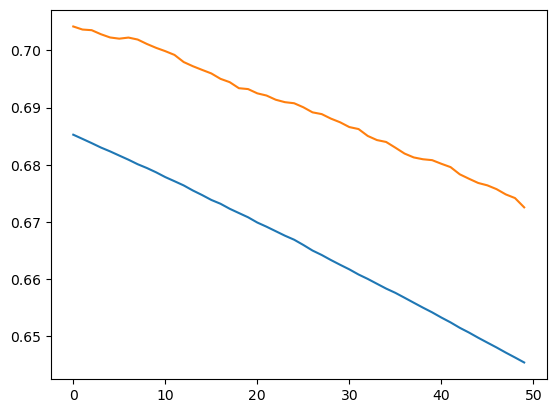

In [26]:
plt.plot(loss)
plt.plot(val_loss)

In [27]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 7s 719us/step


<AxesSubplot: >

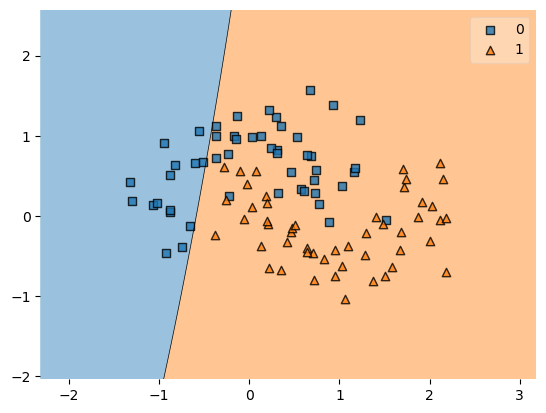

In [28]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 7s 759us/step


<AxesSubplot: >

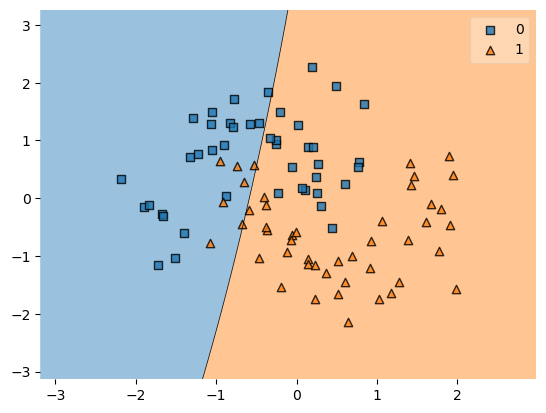

In [29]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 7s 778us/step


<AxesSubplot: >

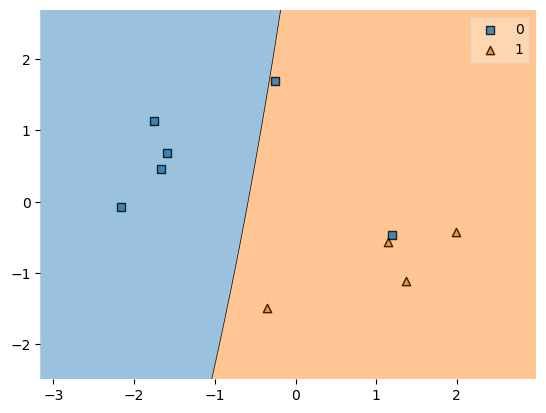

In [30]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the tanh activation func

In [31]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim = 2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [32]:
model.get_weights()

[array([[ 0.9238372 ,  0.9066241 , -1.0253707 ],
        [ 0.49670005, -0.20273489, -0.69157356]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.97984517, -0.21237063],
        [-0.66810703, -0.8927085 ],
        [-0.9693953 , -0.833472  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.3983943],
        [-1.1992835]], dtype=float32),
 array([0.], dtype=float32)]

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 0s 11ms/step - loss: 1.0142 - accuracy: 0.9028 - val_loss: 0.2063 - val_accuracy: 0.8889
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 1.0137 - accuracy: 0.9028 - val_loss: 0.2049 - val_accuracy: 0.8889
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0131 - accuracy: 0.9028 - val_loss: 0.2031 - val_accuracy: 0.8889
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0126 - accuracy: 0.9028 - val_loss: 0.2012 - val_accuracy: 0.8889
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 1.0120 - accuracy: 0.9028 - val_loss: 0.1992 - val_accuracy: 0.8889
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0112 - accuracy: 0.9028 - val_loss: 0.1957 - val_accuracy: 0.8889
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0106 - accuracy: 0.9028 - val_loss: 0.1929 - val_accuracy: 0.8889
Epoch 8/50
8/8 [=================

In [37]:
#SGD
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 51ms/step


array([[ 0.8658912 ],
       [ 0.8639245 ],
       [-0.69475067],
       [ 0.9715992 ],
       [-0.5507884 ],
       [ 0.94159704],
       [-0.48830745],
       [-0.5457142 ],
       [-0.9760314 ],
       [ 0.83786654]], dtype=float32)

In [38]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.9

In [40]:
val_loss = history.history['val_loss']
loss = history.history['loss']

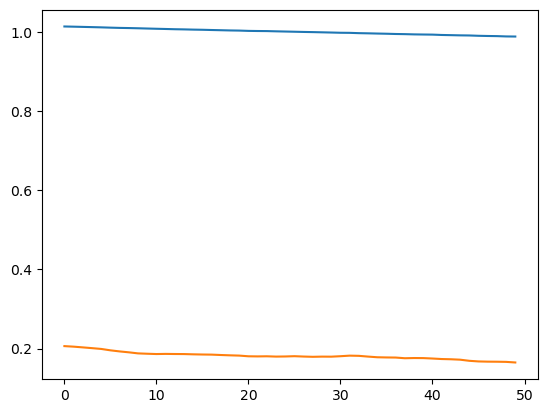

In [41]:
plt.plot(loss)
plt.plot(val_loss)

In [42]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 7s 712us/step


<AxesSubplot: >

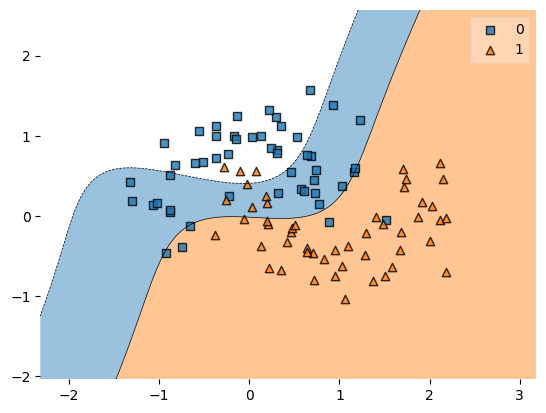

In [43]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 906us/step


<AxesSubplot: >

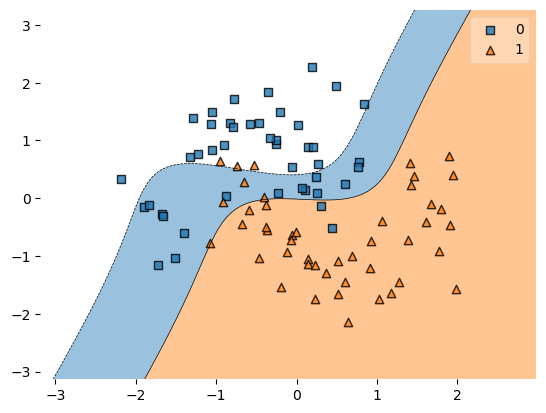

In [44]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 8s 863us/step


<AxesSubplot: >

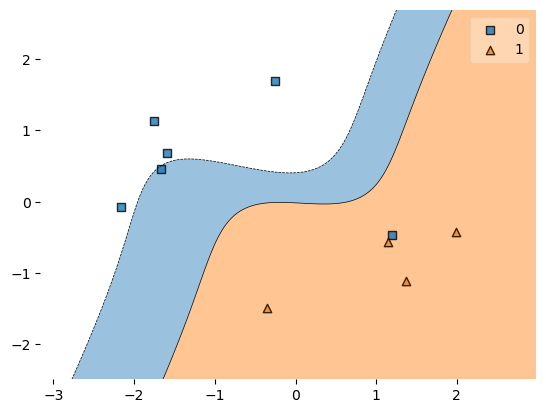

In [45]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the Relu activation func

In [157]:
model = Sequential()
model.add(Dense(3, activation='relu', input_dim = 2))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [158]:
model.get_weights()

[array([[ 0.5632826 ,  0.1165849 ,  0.44309926],
        [-0.09163046,  0.30539393, -0.774171  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.13008738,  0.30319035],
        [ 0.38144326, -0.6555477 ],
        [-0.10625076,  0.02140141]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.363838 ],
        [ 0.8092128]], dtype=float32),
 array([0.], dtype=float32)]

In [159]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 3)                 9         
                                                                 
 dense_34 (Dense)            (None, 2)                 8         
                                                                 
 dense_35 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.compile(optimizer='Rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [161]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 24ms/step - loss: 0.6524 - accuracy: 0.7778 - val_loss: 0.6518 - val_accuracy: 0.7778
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6434 - accuracy: 0.7778 - val_loss: 0.6458 - val_accuracy: 0.7778
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6362 - accuracy: 0.7639 - val_loss: 0.6410 - val_accuracy: 0.7778
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6293 - accuracy: 0.7639 - val_loss: 0.6372 - val_accuracy: 0.7778
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6233 - accuracy: 0.7778 - val_loss: 0.6327 - val_accuracy: 0.7778
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6174 - accuracy: 0.7778 - val_loss: 0.6273 - val_accuracy: 0.7778
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6120 - accuracy: 0.7778 - val_loss: 0.6236 - val_accuracy: 0.7778
Epoch 8/50
8/8 [=================

In [162]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 50ms/step


array([[0.87376153],
       [0.9301807 ],
       [0.20392671],
       [0.7706312 ],
       [0.35318848],
       [0.9244982 ],
       [0.28523165],
       [0.25912714],
       [0.16991024],
       [0.8703521 ]], dtype=float32)

In [163]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [164]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.9

In [165]:
val_loss = history.history['val_loss']
loss = history.history['loss']

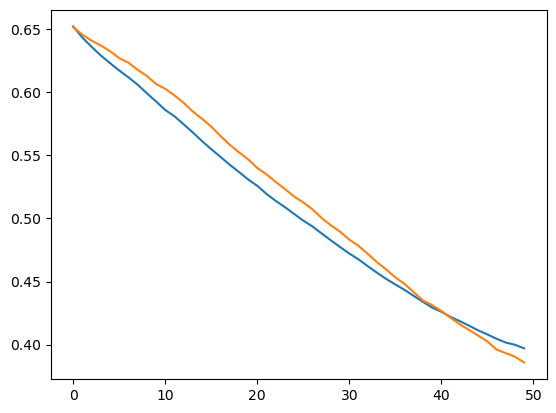

In [166]:
plt.plot(loss)
plt.plot(val_loss)

In [167]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 7s 698us/step


<AxesSubplot: >

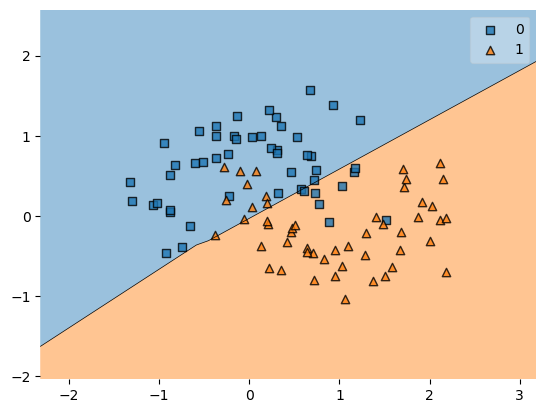

In [168]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 7s 701us/step


<AxesSubplot: >

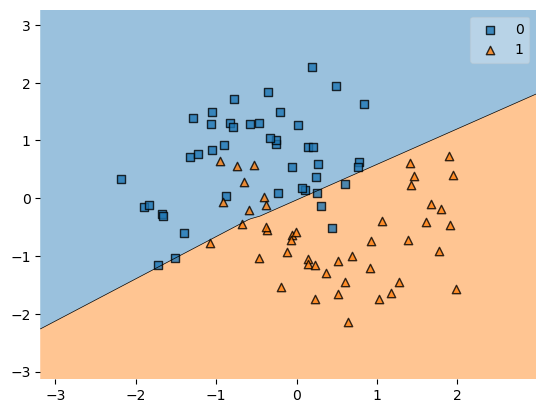

In [169]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

### Decision surface on the test data

9600/9600 [==============================] - 7s 715us/step


<AxesSubplot: >

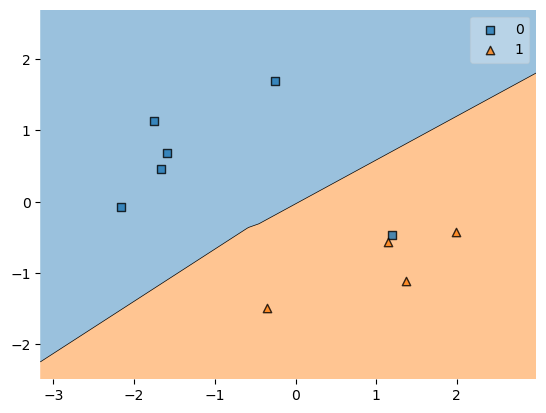

In [170]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)